In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import scipy.optimize as opt
import matplotlib as mpl
import sklearn as skl
import sklearn.preprocessing
mpl.rcParams['font.size'] = 16
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

# I. Plotting Implicit $\mathscr{C}^1$ curves
## 1. Definition
We will denote by implicit $\mathscr{C}^1$ curve on 2 dimensional space any curve defined by
$$ F\left(x,y\right) = 0$$ where $F$ is a $\mathscr{C}^1$ function
1. Let $R=R_{\frac{\pi}{2}}$ be the rotation of angle $\frac{\pi}{2}$ about the origin
2. Let $\nabla F$ be the gradient of $F$

## 2. Projection
Let $\Pi$ a projection on $H=F^{-1}\left(\{0\}\right)$

## 3. Algorithm
1. select coefficient $\alpha$ and rectangle $\mathcal{R}\subset \mathbb{R}^2$
2. $a_0\in \mathbb{R}^2$
3. $a_{n+1}=\begin{cases}u_n+\alpha R \frac{\nabla F(u_n)}{\lVert \nabla F(u_n)\rVert} & \nabla F(u_n) \neq 0\\
                                u_n+ \dfrac{\alpha}{\lVert u_n-u_{n-1}\rVert}\left(u_n-u_{n-1}\right) & \nabla F(u_n)=0
\end{cases}$
4. $u_{n}=\Pi(a_n)$
5. if $\nabla F(u_n)\cdot \nabla F(u_{n-1}) < 0:$ $\alpha\leftarrow -\alpha$ 

## 4. Stopping Criteria
1. $u_n \approx u_0$ and $\nabla F(u_n) \approx \nabla F(u_0)$
2. $u_n \notin \mathcal{R}$
3. 
## 5. Limitations
1. This algorithm only traces the connected part of the Set in which the initial point is located
2. This algorithm has undefined behaviour when $\nabla F=0$
3. This algorithm only traces the curve in one direction

In [320]:
inf_region = np.array([[-np.inf,-np.inf],[np.inf,np.inf]])
def normalize(x,tol=np.power(10.,-8)):
    if np.linalg.norm(x)<tol:
        return x
    return x/np.linalg.norm(x)

def differential_curve_points(f,df,n,alpha=.01,x0=None,region=inf_region,tol=np.power(10.,-8)):
    u=np.zeros([n,2])
    R=np.array([[0,-1],[1,0]])
    k=1
    if x0 is None:
        x0=u[0,:]
    u[0,:]=opt.root(lambda s:[f(s),f(s)],jac=lambda s:[df(s),df(s)],x0=x0).x
    for i in range(1,n):
        
#calculate the gradient of the last point
        grad=df(u[i-1,:])
        
#if the gradient is practically zero, estimate the tangent of the curve with the help of the previous two points
        if np.linalg.norm(grad) < 0.0001:
            grad=u[i-1,:]-u[i-2,:]
        
        p=u[i-1,:]+alpha*R@normalize(grad)
        s=opt.root(lambda s:[f(s),f(s)],
                        jac=lambda s:[df(s),df(s)],x0=p).x
        
#check whether the new point is still on the region
        if (np.all(u>=region[0,:]) and np.all(u<=region[1,:])):
            k=k+1
            u[i,:]=s
        else:
            break

#check whether the gradient changed its orientation, if so flip alpha so that the algorithm won't do a roll back
        if df(u[i,:])@grad < 0:
            alpha=-alpha
            
#check whether the curve is a closed loop
#if the current point is so close to the first two, we will declare that our loop is closed
        if i>2 and np.linalg.norm(u[i,:]-u[0,:])<np.linalg.norm(u[1,:]-u[0,:]) \
    and np.linalg.norm(u[i,:]-u[1,:])<np.linalg.norm(u[1,:]-u[0,:]):
            u[k,:]=u[0,:]
            k=k+1
            break
    return u[:k,:]
def plot_differential_curve(f,df,n,alpha=0.01,x0=None,region=inf_region,color="xkcd:bright blue",label=None,ax=None):
    p=differential_curve_points(f,df,n,alpha,x0,region)
    if ax is None:
        fig,ax=plt.subplots(figsize=(8,8))
    ax.plot(p[:,0],p[:,1],color=color,antialiased=True,label=label)
    return ax

## Example

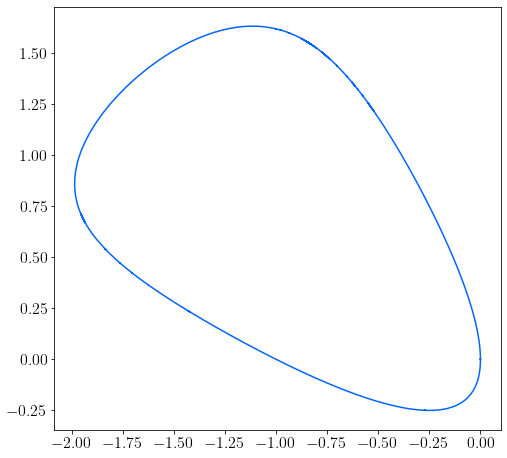

In [347]:
ax=plot_differential_curve(lambda s:s[0]**2+s[1]**2+s[0]+s[0]*s[1]+np.sin(s[0]*s[1]),
                        df=lambda s:np.array([2*s[0]+s[1]+1+s[1]*np.sin(s[0]*s[1]),2*s[1]+s[0]+s[0]*np.sin(s[0]*s[1])]),
                        n=6000,alpha=.01,
                       region=np.array([[-30,-30],[30,30]]))
ax.set_aspect('equal')

# II. Theory of Quadratic forms
## Definitions
Let $E$ be a vector space
### Quadratic form & Quadrics
A quadratic form is any homogeneous polynomial of degree $2$

A quadric is the set of roots a correspending polynomial of degree $2$ 
## 1. Notations 
We will denote by $\mathcal{S}_p$ be the set of symmetric $p\times p$  matrices
## 2. Matrix Form of Quadric:
$\DeclareMathOperator {\mat} {mat}$
$\DeclareMathOperator {\diag} {diag}$
$\DeclareMathOperator {\vect} {vect}$

Let $n\in\mathbb{N}^*$
$\forall u=\left(x,y\right),$ let $v=\left(1,x,y\right)$

Let $M\in \mathbb{R}^{n\times n}$ be a symmetric matrix, and let $a\in\mathbb{R}^n$, and $c\in\mathbb{R}$
    Every quadric $\mathcal{K}$ can be expressed with $\left(M,a,c\right)$ as the set of points in $\mathbb{R}^n$ that satisfies:
$$ \begin{align} & u^TMu + a^Tu + c & =0  \\
    \iff & v^T\begin{pmatrix}
    c & \frac{a^T}{2} \\
    \frac{a}{2} & M
    \end{pmatrix}v & =0 \\
    \iff & v^THv & =0 \end{align}
   $$
   We will call $H$ the matrix of the quadric and $M$ the matrix of the associated quadratic form
   
## 3. Spectral Decomposition of non-degenerate $M$
1. $M$ is a symmetric matrix, correspending to a symmetric non-degenerate bilinear $f$ form in some basis $\mathscr{B}_0$, so there exists an orthogonal basis $\mathscr{B}=\left(u_1,\dots,u_n\right)$ of $\mathbb{R}^{n}$ such that
$D=\mat(f,\mathscr{B})$ is a diagonal matrix with diagonal elements $D_{i,i}=\lambda_i\in\{\pm 1\}$
2. Let $U=\begin{pmatrix}u_1 & \dots & u_n\end{pmatrix},$ we have $H=UDU^T,$ 
so we can write that quadratic form in its canonical form
$$ u^TMu = \sum_{i=1}^{n} D_{i,i}\cdot\left( U^Tu\right)_i^2$$
3. $H$ is also a symmetric matrix, correspending to a symmetric bilinear form $\phi$ in some basis $\mathscr{B}^P_0$
4. Let $v_i=\begin{pmatrix}1 \\ u_i\end{pmatrix},$ and let: 
$$ \begin{align}
v_0 &=\mathbb{1}-\sum_{i=1}^n \frac{\phi\left(\mathbb{1},v_i\right)}{\phi\left(v_i,v_i\right)}v_i\\
& = \mathbb{1}-\sum_{i=1}^n \frac{\phi\left(\mathbb{1},v_i\right)}{D_{i,i}}v_i\\
& = \mathbb{1}-\sum_{i=1}^n \frac{\phi\left(\mathbb{1},v_i\right)}{\lambda_{i}}v_i \\
& = \mathbb{1}-\sum_{i=1}^n \frac{\langle a,u_i \rangle}{2\lambda_{i}}v_i 
\end{align}
$$
By construction, $\mathscr{B}^P=\left(v_0,\dots,v_n\right)$ is an orthogonal basis of $\mathbb{R}^{n+1}$ with respect to $\phi$

## 4. Center of Quadric

5. Let $u=\sum_{i=1}^{n}\alpha_i u_i,$ we have

$$
\begin{align}
    v^THv & = \sum_{i=1}^n \lambda_i \alpha_i^2+\sum_{i=1}^n \langle a,u_i \rangle \alpha_i + c \\
    & =\sum_{i=1}^n \left(\lambda_i \alpha_i^2+ \langle a,u_i \rangle \alpha_i \right) + c  \\
    & = \sum_{i=1}^n \lambda_i \left(\alpha_i^2+ \frac{\langle a,u_i \rangle \alpha_i}{\lambda_i}\right) + c \\
    & = \sum_{i=1}^n \lambda_i \left(\left(\alpha_i+ \frac{\langle a,u_i \rangle}{2\lambda_i}\right)^2
    - \frac{\langle u_i,a \rangle^2}{4\lambda_i^2}\right) + c \\
    & = \sum_{i=1}^n \lambda_i \left(\alpha_i+ \frac{\langle a,u_i \rangle}{2\lambda_i}\right)^2
    + c - \sum_{i=1}^n \frac{\langle u_i,a\rangle^2}{4\lambda_i} 
  \end{align}
$$

Let $s=\left(s_1,\dots,s_n\right)_{\mathscr{B_0}}=\left(s'_1,\dots,s'_n\right)_{\mathscr{B}}$ be a center of the quadric (if it 
exists), we have  
$$ \begin{align}
s'_i & = - \frac{\langle a,u_i \rangle \alpha_i}{2\lambda_i} & \forall i \in \{1,\dots ,n\}\\
& = - \frac{u_i^T a}{2\lambda_i} & \forall i \in \{1,\dots ,n\}\\
\implies s' & =-\frac{1}{2}D^{-1}U^Ta \\
\implies s  & = Us' \\
& =-\frac{1}{2}UD^{-1}U^Ta \\
& = -\frac{1}{2}M^{-1}a
\end{align}
$$

## 5. Reducing Problem to the Homogeneous Case
Let $\mathcal{Q}\in\mathscr{F}\left(E,\mathbb{R}\right)/\quad \mathcal{Q}(u) = \begin{pmatrix}1 & u+s\end{pmatrix}H\begin{pmatrix}1 \\ u+s\end{pmatrix}+c'$

We can verify that $Q$ is a quadratic form on $E$

Let $u=\sum_i \alpha_i u_i:$
$$\begin{align}
\mathcal{Q}(u) &= \sum_{i=1}^n \lambda_i \alpha_i^2  \\
\mathcal{K} &= s+\left\{ u \in E/\mathcal{Q}(u)=c' \right\}
\end{align}$$

## 6. Axes of $\mathcal{K}$
We know that $\vect(u_1),\dots \vect(u_n)$ are the axes of $\mathcal{K}'= \left\{ u \in E/\mathcal{Q}(u)=c' \right\}$, so by translation $s+\vect(u_1),\dots,s+\vect(u_n)$ are the axes of $\mathcal{K}$

We will use affine geometry to make it clearer

Let $O$ the origin and $S=O+s$

The axes are the lines $L_i=S+\vect{u_i}$
# III. Analysis on $\mathcal{S}_{p+1}$

## 1. $\mathcal{S}_{p+1}$ as an inner product space
- For $k\in\mathbb{N}$, let $\langle \cdot , \cdot  \rangle_\mathcal{S_k}$ the inner product on $\mathcal{S}_k$ verifying:
$$ \langle H , K  \rangle_\mathcal{S_k} = \sum_{i=0}^k\sum_{j=i}^k H_{i,j}K_{i,j} $$
- Let $\lVert \cdot \rVert_\mathcal{S_k}$ be the induced norm

## 2. Unit Sphere of $\mathcal{S}_{p+1}$
We can show that every non-zero quadric can be expressed as:
$$\begin{cases} 
    v^THv=0 \\
    H \in \mathcal{S_{p+1}}\\
    \lVert H \rVert_\mathcal{S_{p+1}}=1
\end{cases}$$
This representation is unique up to a sign

# IV. Optimization Problem
## 1. Problem
Given a set of points, we want to fit quadric $\mathcal{K}$ on it
## 2. Fitting a Quadric

1. Let $X=\left(x_1,\dots,x_n\right) \in\mathbb{R}^{n\times p}$ a tuple of observed values
2. Let $V=\left(v_1,\dots,v_n\right)$ with $v_i=\begin{pmatrix} 1 \\ x_i \end{pmatrix}$
3. Our objective is to fit a quadratic form on $\mathbb{R}^p$ to  $X$
4. Let $\mathcal{S} \in \mathscr{C}^\infty\left(\mathcal{S_{p+1}},\mathbb{R}_+\right)/$
$$ \mathscr{L}(H)=\sum_{i=1}^n \left(v_i^T H v_i\right)^2$$
5. We want to find:
$$ H_{\text{min}}=\arg \min_{H\in\mathcal{S_{p+1}}}\mathscr{L}\left(H\right) \quad \text{subject to} \quad \lVert H \rVert_\mathcal{S_{p+1}}=1$$

## 3. Fitting trajectory of planets
This correspends to the special case $p=2$
It is known that the trajectory of planets are a conic section

In [357]:
def F(s,V):
    return np.sum((V@s)**2),2*V.T@V@s
def create_ellipse_dataset(a=2,b=1,x0=0,y0=0,phi=0,sigma=.05,n=1000,random_state=0):
    np.random.seed(random_state)
    #sampling n angles from the uniform distribution
    theta=np.random.uniform(0,2*np.pi,n)
    X_ellipse=a*np.cos(theta)
    Y_ellipse=b*np.sin(theta)
    #adding a centered guassian error term to the ellipse points
    P=np.c_[X_ellipse,Y_ellipse]+np.random.multivariate_normal(np.zeros(2),np.diag([a**2*sigma**2,b**2*sigma**2]),n)
    rotation=np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])
    # rotating points then translating them
    P=P@rotation.T+np.array([x0,y0])
    return P

def create_hyperbolic_dataset(a=1,b=1,x0=0,y0=0,phi=0,sigma=.05,n=1000,random_state=0):
    np.random.seed(random_state)
    #sampling n angles from the uniform distribution
    theta=np.random.uniform(-2,2,n)
    X_hyperbolic=a*np.cosh(theta)
    Y_hyperbolic=b*np.sinh(theta)
    #adding a centered guassian error term to the ellipse points
    P=np.c_[X_hyperbolic,Y_hyperbolic]+np.random.multivariate_normal(np.zeros(2),np.diag([a**2*sigma**2,b**2*sigma**2]),n)
    rotation=np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])
    # rotating points then translating them
    P=P@rotation.T+np.array([x0,y0])
    return P
''' 
    All of the abose steps are equivalent to sampling from an ellipse with parameters (x0,y0,a,b,phi) and adding a centered 
    guassian error term 
''';

## Fitting an Ellipse

In [377]:
x0=30
y0=20
P=create_ellipse_dataset(x0=x0,y0=y0,phi=np.pi/7,a=50,b=40) 
poly=PolynomialFeatures(2)
V=poly.fit_transform(P)
constraint=opt.NonlinearConstraint(lambda s: np.sum(s**2),jac=lambda s:2*s,lb=1,ub=1)
w=opt.minimize(lambda s:F(s,V),jac=True,constraints=constraint,x0=np.random.normal(0,1,6)).x

for i,u in enumerate(w):
    print("{} = {:2f}".format(poly.get_feature_names()[i],u))

M=np.array([[w[3],w[4]/2],[w[4]/2,w[5]]])
a=w[1:3]
c=w[0]
H=np.c_[np.r_[c,a/2],np.r_[np.atleast_2d(a/2),M]]

1 = 0.998649
x0 = 0.041120
x1 = 0.031729
x0^2 = -0.000824
x0 x1 = 0.000376
x1^2 = -0.001096


[29.38740295 19.50689338]
[[ 0.99966302 -0.02477379 -0.00775226]
 [ 0.02055282  0.57295394  0.81932983]
 [ 0.01585622  0.81921307 -0.57327003]]
-1.9123133529999108 [-0.00072839 -0.00119226]
[51.23879296 40.04914567]


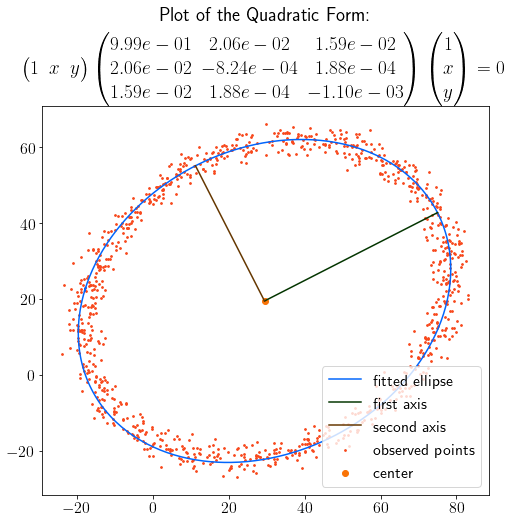

In [378]:

# Plot fit ellipse
ax=plot_differential_curve(lambda p:p@M@p+a@p+c,lambda p:2*M@p+a,500,1,x0=np.random.normal(0,1,2),label="fitted ellipse")
# Plot observations
ax.scatter(P[:,0],P[:,1],s=3,color="xkcd:reddish orange",label="observed points")
#Axes of the ellipse
µ,U=np.linalg.eig(M)
µ1,µ2=µ
u1=U[:,0]
u2=U[:,1]
s,V=np.linalg.eig(H)
v0,v1,v2=V.T
s0,s1,s2=s
#Position of center point
u0=-(np.linalg.inv(M)@a/2)
#Length of ellipse axes
#For an ellipse the ratio C/µ is positive element-wise
C=np.sum(((U.T@a/2)**2)/µ)-c
L=np.sqrt(C/µ)
#L=np.sqrt(-s[0]/s[1:])
#Plotting Center
ax.scatter(u0[0],u0[1],color="xkcd:orange",label="center")
#Plotting First & Second axis of the ellipse
ax.plot([u0[0],u0[0]+L[0]*u1[0]],[u0[1],u0[1]+L[0]*u1[1]],color="xkcd:dark green",label="first axis")
ax.plot([u0[0],u0[0]+L[1]*u2[0]],[u0[1],u0[1]+L[1]*u2[1]],color="xkcd:brown",label="second axis")
#ax.plot([v1[0],v1[0]+L[0]*v1[1]],[v2[0],v2[0]+L[0]*v1[2]],color="xkcd:dark green",label="first axis")
#ax.plot([u0[0],u0[0]+L[1]*u2[0]],[u0[1],u0[1]+L[1]*u2[1]],color="xkcd:brown",label="second axis")

#Show Equation
v_str=r"\begin{pmatrix}1\\x \\ y\end{pmatrix}"
v_T_str=r"\begin{pmatrix}1&x & y\end{pmatrix}"
H_str=r"\begin{{pmatrix}}{:.2e}&{:.2e}&{:.2e} \\ {:.2e}&{:.2e} &{:.2e} \\{:.2e} &{:.2e}&{:.2e} \end{{pmatrix}}".format(*list(H.flatten()))
latex="Plot of the Quadratic Form: \n$ {} {} {} = 0 $".format(v_T_str,H_str,v_str)
ax.set_aspect('equal')
ax.legend(loc="lower right")
ax.set_title(latex);

## Fitting an Hyperbola

In [376]:
x0=1
y0=0
P=create_hyperbolic_dataset(x0=x0,y0=y0,phi=np.pi/5,random_state=1,sigma=0.01) 
poly=PolynomialFeatures(2)

V=poly.fit_transform(P)
constraint=opt.NonlinearConstraint(lambda s: np.sum(s**2),jac=lambda s:2*s,lb=1,ub=1)
w=opt.minimize(lambda s:Q(s,V),jac=True,constraints=constraint,x0=np.random.normal(0,1,6)).x

for i,u in enumerate(w):
    print("{} = {:2f}".format(poly.get_feature_names()[i],u))

M=np.array([[w[3],w[4]/2],[w[4]/2,w[5]]])
a=w[1:3]
c=w[0]
H=np.c_[np.r_[c,a/2],np.r_[np.atleast_2d(a/2),M]]


1 = -0.207997
x0 = -0.232195
x1 = -0.667037
x0^2 = 0.109350
x0 x1 = 0.659306
x1^2 = -0.106032


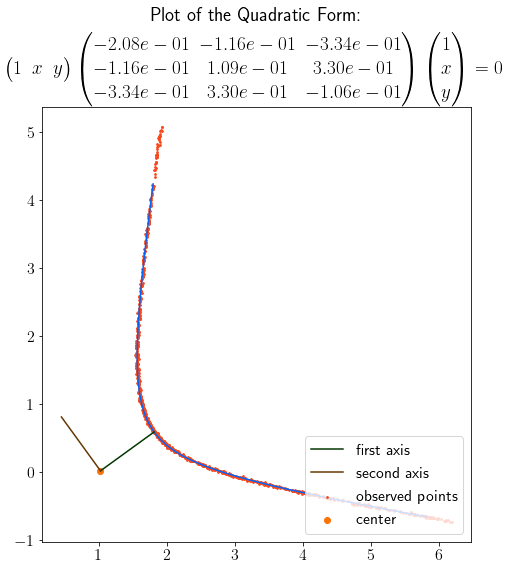

In [348]:
# Plot fit ellipse
ax=plot_differential_curve(lambda p:p@M@p+a@p+c,lambda p:2*M@p+a,800,.01,x0=np.array([6,0]))
# Plot observations
ax.scatter(P[:,0],P[:,1],s=3,color="xkcd:reddish orange",label="observed points")
#Axes of the hyperbola
µ,U=np.linalg.eig(M)
µ1,µ2=µ
u1=U[:,0]
u2=U[:,1]
#Position of center point
u0=-(np.linalg.inv(M)@a/2)
#Length of hyperbola axes
#For an hyperbola the ratio C/µ may not be positive element-wise
C=np.sum(((U.T@a/2)**2)/µ)-c
L=np.sqrt(np.abs(C/µ))
#Plotting Center
ax.scatter(u0[0],u0[1],color="xkcd:orange",label="center")
#Plotting First & Second axis of the ellipse
ax.plot([u0[0],u0[0]+L[0]*u1[0]],[u0[1],u0[1]+L[0]*u1[1]],color="xkcd:dark green",label="first axis")
ax.plot([u0[0],u0[0]+L[1]*u2[0]],[u0[1],u0[1]+L[1]*u2[1]],color="xkcd:brown",label="second axis")
#Show Equation
v_str=r"\begin{pmatrix}1\\x \\ y\end{pmatrix}"
v_T_str=r"\begin{pmatrix}1&x & y\end{pmatrix}"
H_str=r"\begin{{pmatrix}}{:.2e}&{:.2e}&{:.2e} \\ {:.2e}&{:.2e} &{:.2e} \\{:.2e} &{:.2e}&{:.2e} \end{{pmatrix}}".format(*list(H.flatten()))
latex="Plot of the Quadratic Form: \n$ {} {} {} = 0 $".format(v_T_str,H_str,v_str)
ax.set_aspect('equal')
ax.legend(loc="lower right")
ax.set_title(latex);